<div style="background-color: #cce5ff; padding: 15px; border-radius: 10px;">
  <h1 style="text-align: center; color: #003366;"> 📊Freelancer Income Prediction</h1>
</div>

 ## Problem Statement
In today’s rapidly growing gig economy, freelancers play a vital role in the global workforce. However, predicting the income potential of a freelancer remains a challenge due to the variability in skillsets, experience, client feedback, project type, and regional factors.

Objective:
The goal of this project is to develop a machine learning model that can accurately predict the income generated by a freelancer based on various input features such as work hours, experience, skills, client ratings, and geographic region. This predictive model will help freelancers estimate their potential earnings and allow hiring platforms or companies to evaluate freelancer profiles more effectively.

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [93]:
# load the data and get a quick preview of its structure.
df=pd.read_csv("freelancer_income_dataset.csv")
df

freelancer_id  hours_worked_per_week  experience_years  skills_count  \
0                 1                     43              10.2             1   
1                 2                     56               0.8             7   
2                 3                     33               3.3             1   
3                 4                     19               4.1            17   
4                 5                     47               5.7             9   
...             ...                    ...               ...           ...   
4995           4996                      7               1.5             6   
4996           4997                     55               2.0            17   
4997           4998                     26               6.4             8   
4998           4999                     51               1.6             7   
4999           5000                      8               2.3             7   

      average_rating  completed_projects  client_return_rate  hourly_rate  \
0               3.87                  21                0.18        15.97   
1               3.66                 156                0.84        69.93   
2               4.95                 131                0.54       102.35   
3               4.25                  23                0.71        64.09   
4               4.34                  19                0.22       149.95   
...              ...                 ...                 ...          ...   
4995            4.23                  74                0.30        24.25   
4996            4.24                  49                0.43       117.29   
4997            4.01                 112                0.74       135.33   
4998            4.52                 108                0.99        43.65   
4999            4.58                  60                0.03       121.29   

             region  income_generated  
0            Africa           1968.92  
1     South America          13141.96  
2              Asia          10847.34  
3              Asia           3797.65  
4            Europe          26877.23  
...             ...               ...  
4995           Asia            920.66  
4996         Europe          16094.07  
4997  North America          13076.71  
4998           Asia           5681.95  
4999           Asia           3952.51  

[5000 rows x 10 columns]

In [94]:
df.shape

(5000, 10)

In [95]:
df.info()
# null value is not there and In the dataset,all column data type is float64(5), int64(4), object(1) and 
#memory usage is390.8 KB,total 10 column and 5000 rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   freelancer_id          5000 non-null   int64  
 1   hours_worked_per_week  5000 non-null   int64  
 2   experience_years       5000 non-null   float64
 3   skills_count           5000 non-null   int64  
 4   average_rating         5000 non-null   float64
 5   completed_projects     5000 non-null   int64  
 6   client_return_rate     5000 non-null   float64
 7   hourly_rate            5000 non-null   float64
 8   region                 5000 non-null   object 
 9   income_generated       5000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 390.8+ KB


In [96]:
# Remove rows with negative income
df = df[df['income_generated'] >= 0]#Since the  goal is to predict how much freelancers earn, and the negative values are few and likely noise,
#remove them to improve accuracy and simplify your pipeline.


In [97]:
df.describe()#Understand the data distribution:Spot if data is skewed or has outliers.
 # Identify scaling needs:-help to decide whether to apply StandardScaler or othe
 # mean is larger than the median is a positively skewed distribution
 # mean is smaller than the median is a nigatively skewed distribution
# Therefore hourly_rate column is negatively skewed and income_generated column is positively skewed

freelancer_id  hours_worked_per_week  experience_years  skills_count  \
count    4996.000000            4996.000000       4996.000000   4996.000000   
mean     2501.320256              32.241793          2.928563     10.173939   
std      1443.637084              15.790989          2.930152      5.469102   
min         1.000000               5.000000          0.000000      1.000000   
25%      1250.750000              19.000000          0.800000      5.000000   
50%      2502.500000              32.000000          2.000000     10.000000   
75%      3751.250000              46.000000          4.000000     15.000000   
max      5000.000000              59.000000         23.200000     19.000000   

       average_rating  completed_projects  client_return_rate  hourly_rate  \
count     4996.000000         4996.000000         4996.000000  4996.000000   
mean         4.186287           98.428343            0.502254    80.923987   
std          0.477302           57.033322            0.288667    40.223591   
min          2.520000            1.000000            0.000000    10.000000   
25%          3.860000           49.000000            0.257500    46.562500   
50%          4.200000           98.000000            0.500000    81.820000   
75%          4.540000          146.000000            0.750000   115.880000   
max          5.000000          199.000000            1.000000   150.000000   

       income_generated  
count       4996.000000  
mean        9351.950614  
std         7235.872868  
min           52.460000  
25%         3481.570000  
50%         7422.275000  
75%        13648.347500  
max        40711.860000

In [98]:
df.duplicated().any() # not duplicte value

False

In [99]:
df.isnull().sum()#no null values

freelancer_id            0
hours_worked_per_week    0
experience_years         0
skills_count             0
average_rating           0
completed_projects       0
client_return_rate       0
hourly_rate              0
region                   0
income_generated         0
dtype: int64

<Axes: xlabel='income_generated', ylabel='Density'>

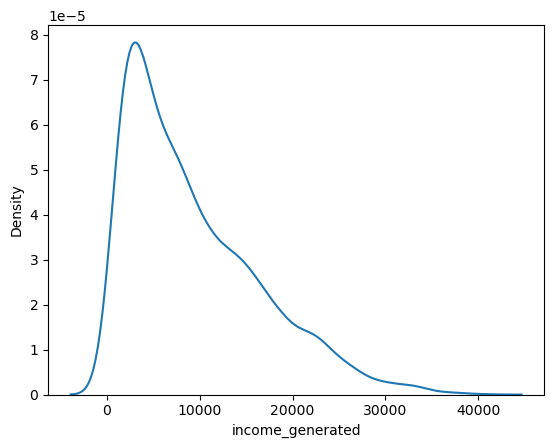

In [100]:
sns.kdeplot(df["income_generated"])#it is positive skweness

In [101]:
df['region'].value_counts()

region
South America    901
Europe           876
Oceania          809
Asia             808
Africa           806
North America    796
Name: count, dtype: int64

In [102]:
#handling categorical data
cols=df.select_dtypes("object").columns
cols

Index(['region'], dtype='object')

In [103]:
df = pd.get_dummies(df, columns=['region'], drop_first=True).astype(int)
df           


freelancer_id  hours_worked_per_week  experience_years  skills_count  \
0                 1                     43                10             1   
1                 2                     56                 0             7   
2                 3                     33                 3             1   
3                 4                     19                 4            17   
4                 5                     47                 5             9   
...             ...                    ...               ...           ...   
4995           4996                      7                 1             6   
4996           4997                     55                 2            17   
4997           4998                     26                 6             8   
4998           4999                     51                 1             7   
4999           5000                      8                 2             7   

      average_rating  completed_projects  client_return_rate  hourly_rate  \
0                  3                  21                   0           15   
1                  3                 156                   0           69   
2                  4                 131                   0          102   
3                  4                  23                   0           64   
4                  4                  19                   0          149   
...              ...                 ...                 ...          ...   
4995               4                  74                   0           24   
4996               4                  49                   0          117   
4997               4                 112                   0          135   
4998               4                 108                   0           43   
4999               4                  60                   0          121   

      income_generated  region_Asia  region_Europe  region_North America  \
0                 1968            0              0                     0   
1                13141            0              0                     0   
2                10847            1              0                     0   
3                 3797            1              0                     0   
4                26877            0              1                     0   
...                ...          ...            ...                   ...   
4995               920            1              0                     0   
4996             16094            0              1                     0   
4997             13076            0              0                     1   
4998              5681            1              0                     0   
4999              3952            1              0                     0   

      region_Oceania  region_South America  
0                  0                     0  
1                  0                     1  
2                  0                     0  
3                  0                     0  
4                  0                     0  
...              ...                   ...  
4995               0                     0  
4996               0                     0  
4997               0                     0  
4998               0                     0  
4999               0                     0  

[4996 rows x 14 columns]

'circles are outliers\nupper whisker\ninside box median values of price quartile 1 2 3 (q2 also called as median no mean)\nlower whisker'

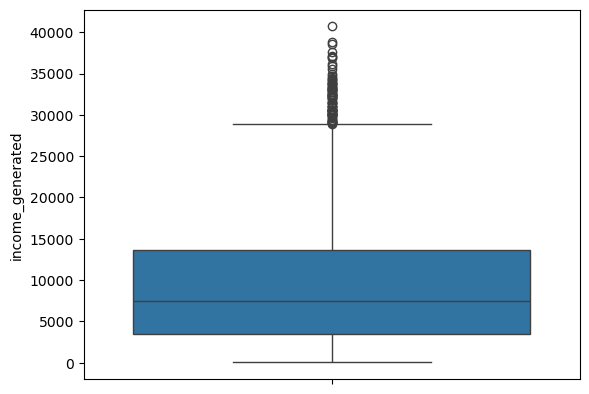

In [104]:
sns.boxplot(data=df,y="income_generated")
'''circles are outliers
upper whisker
inside box median values of price quartile 1 2 3 (q2 also called as median no mean)
lower whisker'''

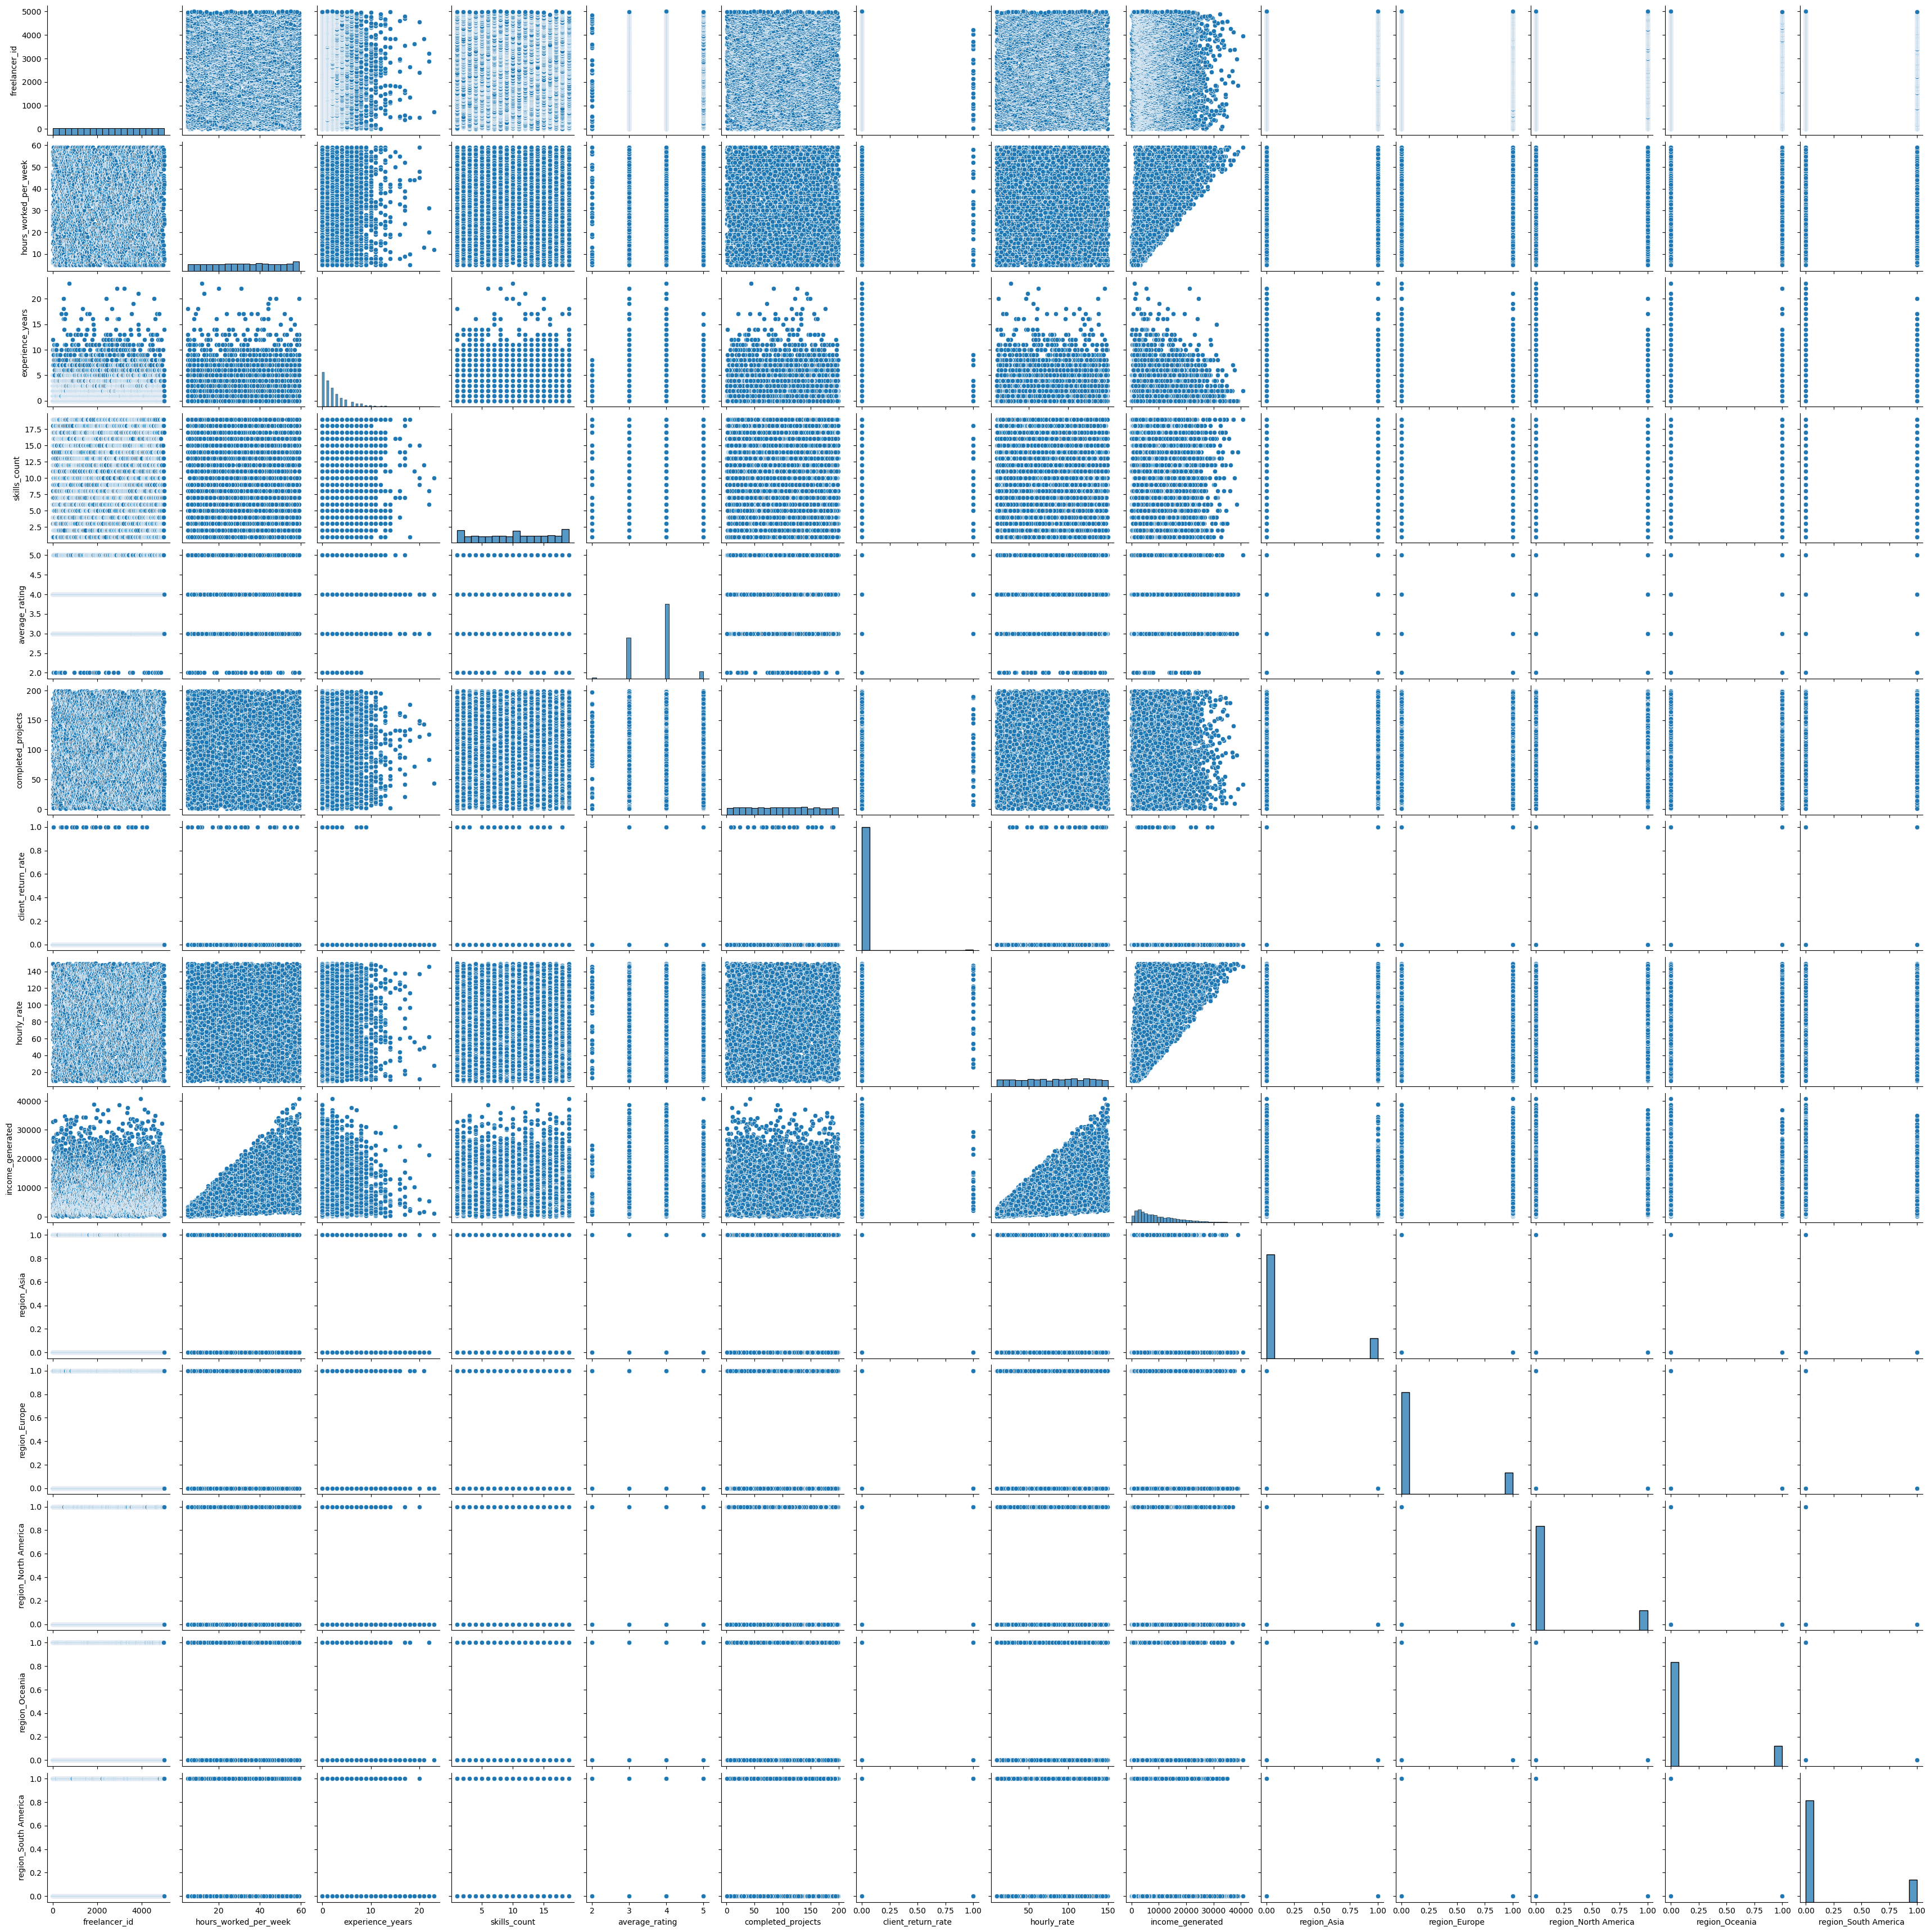

In [105]:
sns.pairplot(df)# linearity property failed 

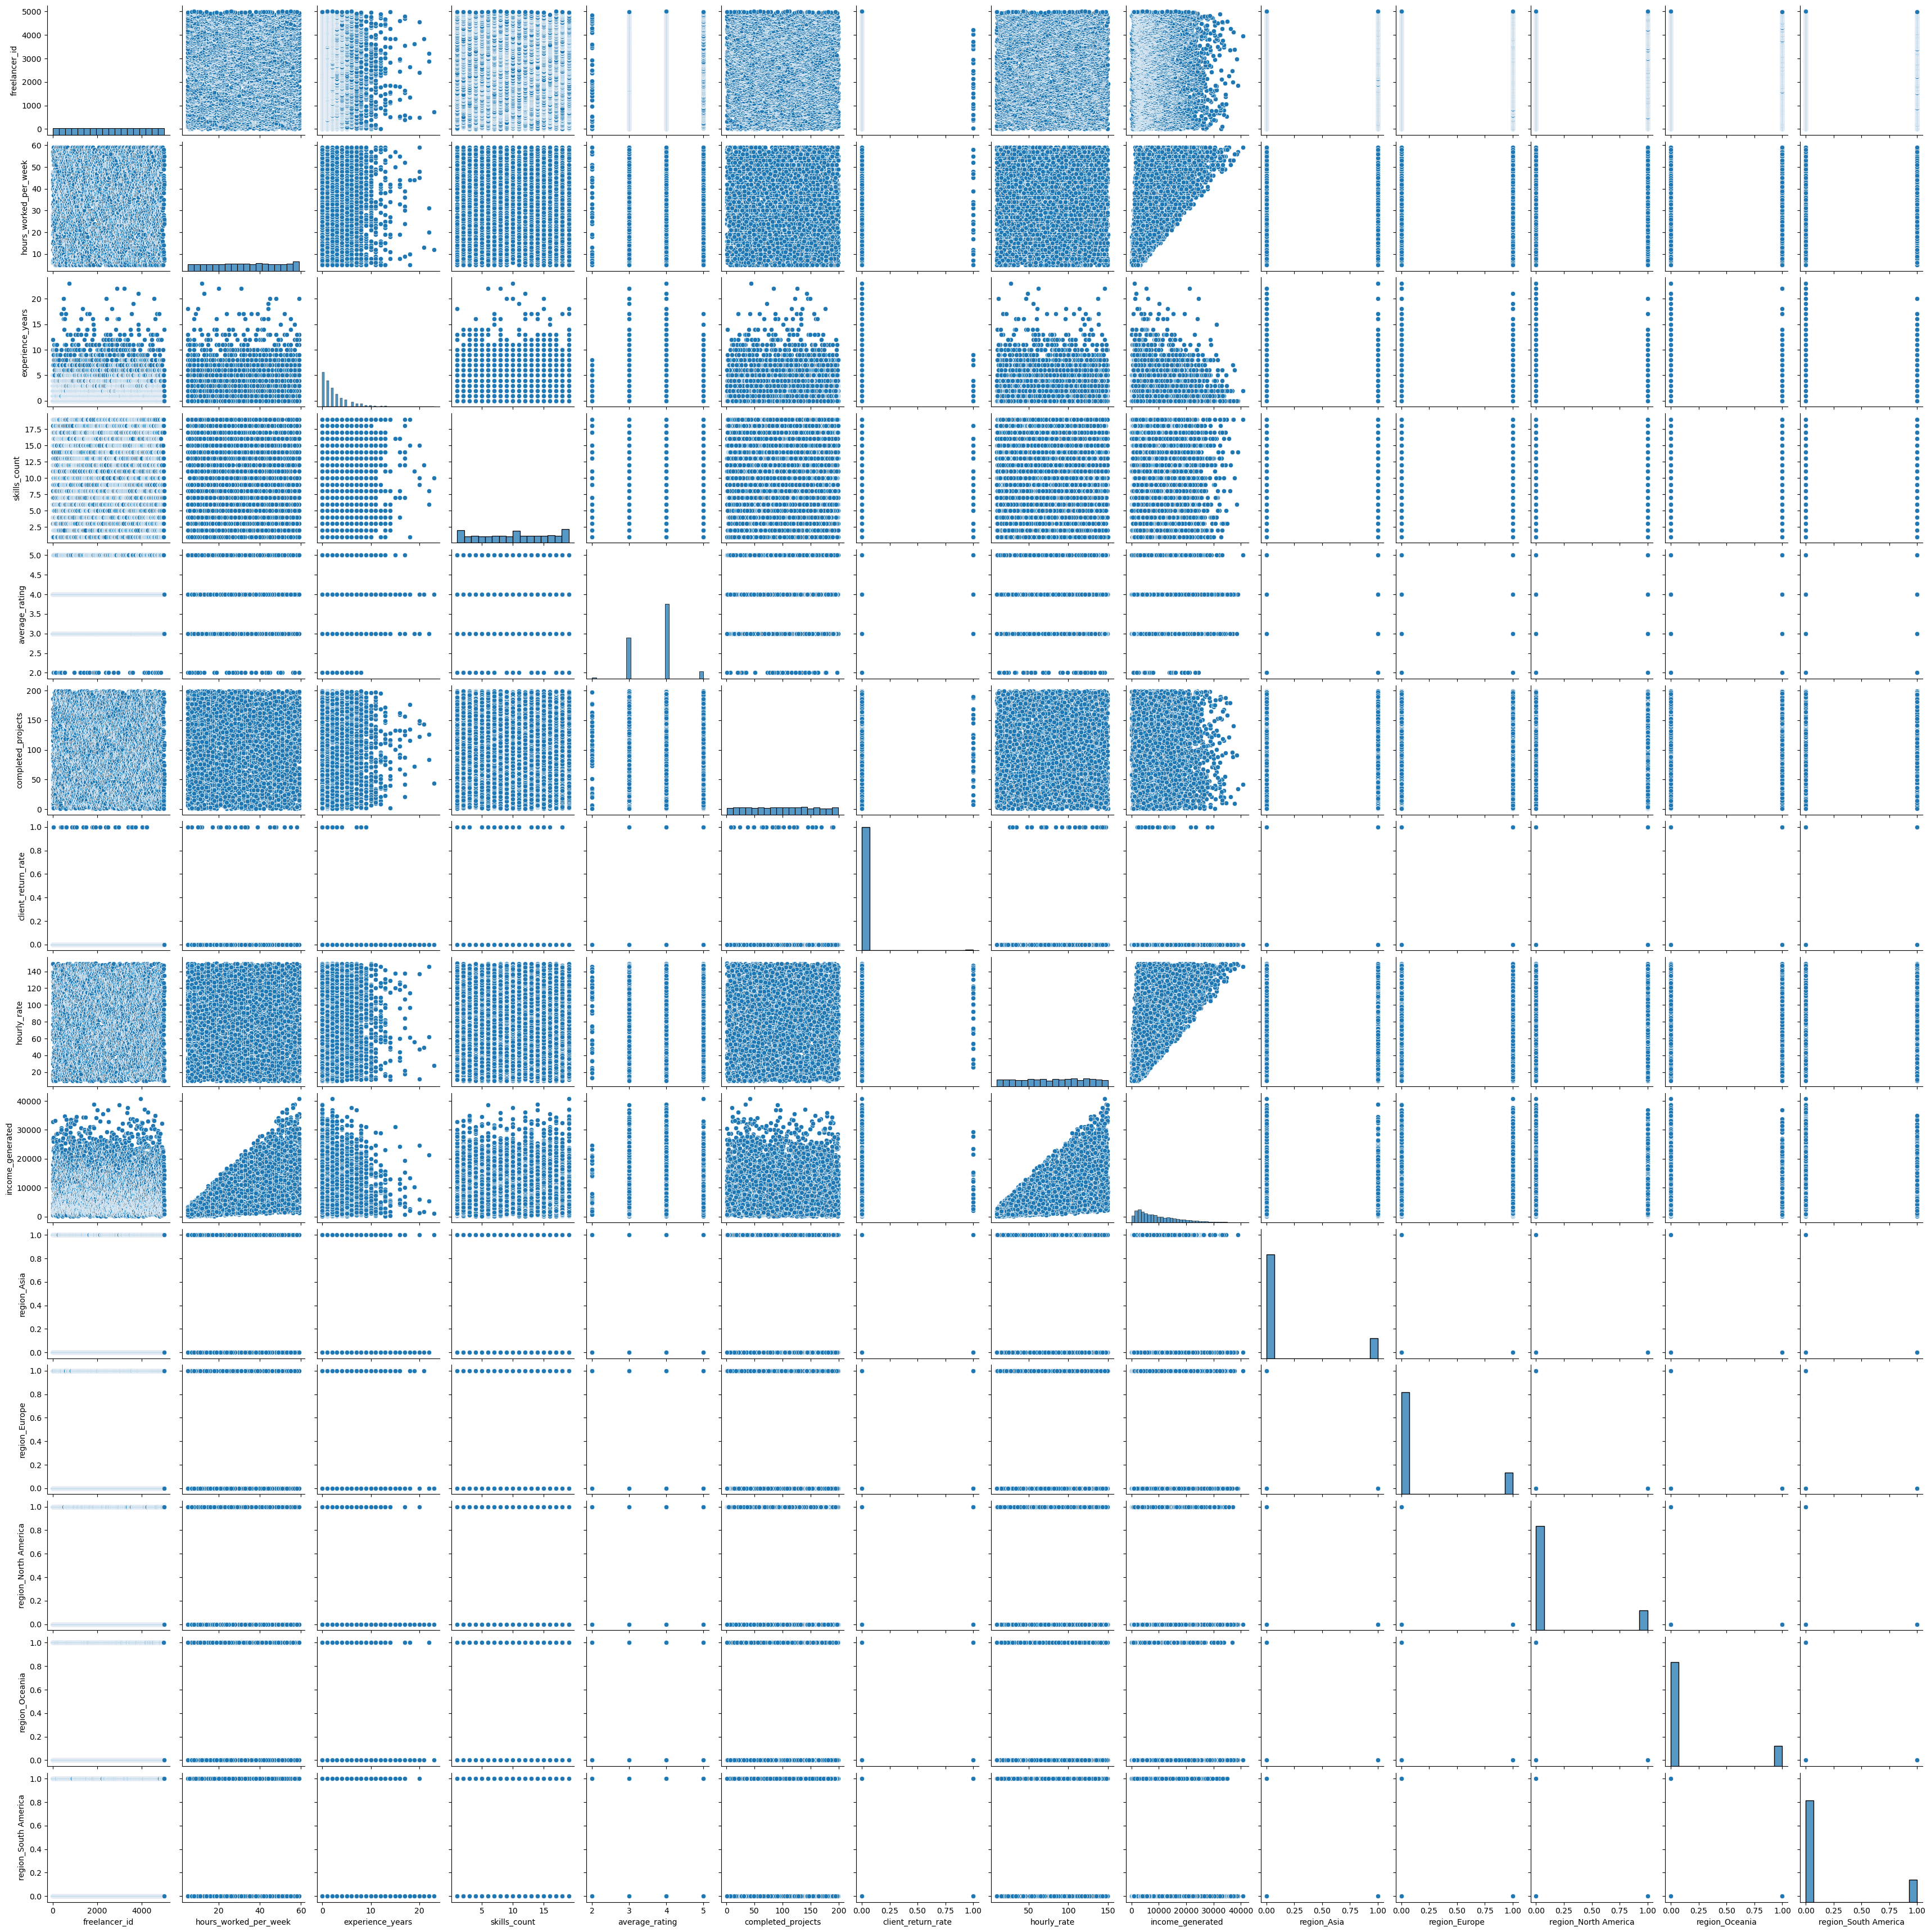

In [106]:
sns.pairplot(df)

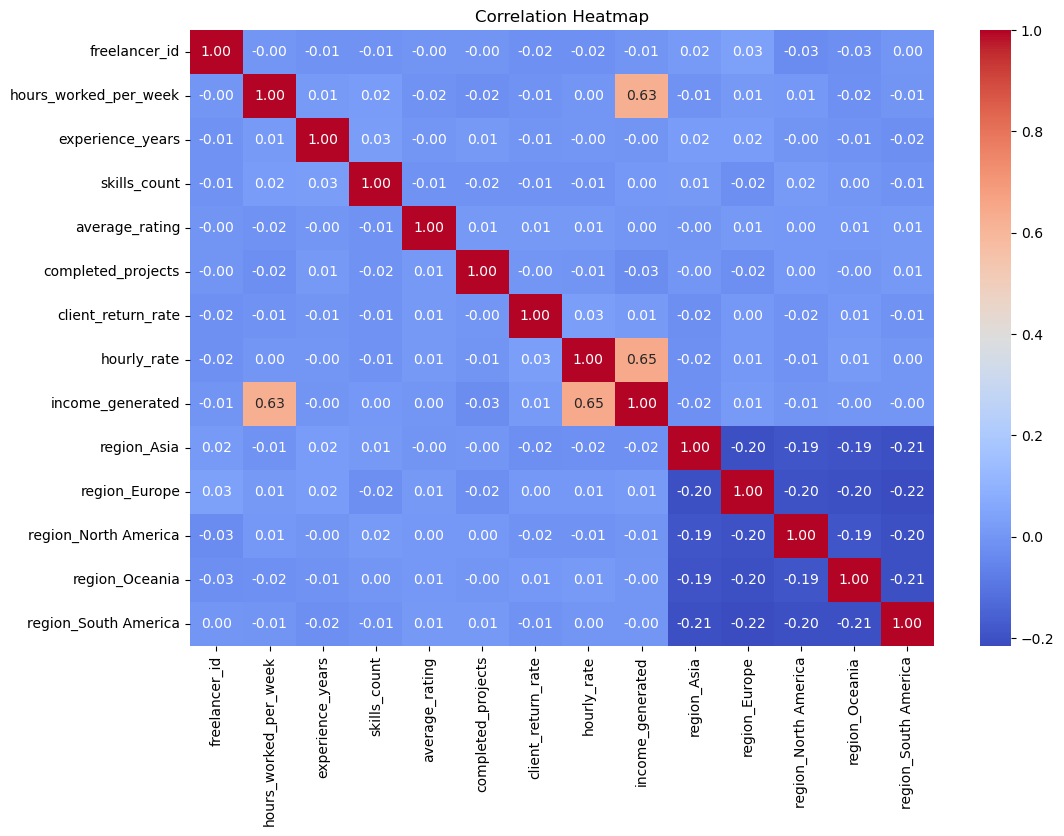

In [107]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [108]:
X = df.drop(['freelancer_id', 'income_generated'], axis=1)
y = df['income_generated']


In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X.iloc[:,:]=scaler.fit_transform(X.iloc[:,:])
X.head()

hours_worked_per_week  experience_years  skills_count  average_rating  \
0               0.681356          2.562298     -1.677580       -1.223177   
1               1.504693         -0.853188     -0.580398       -1.223177   
2               0.048020          0.171458     -1.677580        0.496292   
3              -0.838650          0.513007      1.248238        0.496292   
4               0.934690          0.854555     -0.214671        0.496292   

   completed_projects  client_return_rate  hourly_rate  region_Asia  \
0           -1.357734           -0.072328    -1.626683    -0.439240   
1            1.009540           -0.072328    -0.284132    -0.439240   
2            0.571156           -0.072328     0.536316     2.276657   
3           -1.322663           -0.072328    -0.408442     2.276657   
4           -1.392805           -0.072328     1.704833    -0.439240   

   region_Europe  region_North America  region_Oceania  region_South America  
0      -0.461109             -0.435343       -0.439565             -0.469068  
1      -0.461109             -0.435343       -0.439565              2.131889  
2      -0.461109             -0.435343       -0.439565             -0.469068  
3      -0.461109             -0.435343       -0.439565             -0.469068  
4       2.168685             -0.435343       -0.439565             -0.469068

In [110]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, random_state=42)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(3996, 12) (3996,)
(1000, 12) (1000,)


In [111]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
temp_df=pd.DataFrame({
    "Columns":X.columns,
    "Coefficients(Slope)":lr.coef_
})
temp_df

Columns  Coefficients(Slope)
0   hours_worked_per_week          4488.153932
1        experience_years           -61.801872
2            skills_count           -11.409355
3          average_rating            28.225408
4      completed_projects          -105.711053
5      client_return_rate           -30.408448
6             hourly_rate          4671.587952
7             region_Asia            20.429950
8           region_Europe            67.162891
9    region_North America            36.752886
10         region_Oceania            32.197897
11   region_South America            42.051996

In [112]:
lr.intercept_

9368.127275504332

In [113]:
ypred=lr.predict(xtest)

In [114]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)

In [115]:
print("mean_absolute_error : ",mae)
print("mean_squared_error : ",mse)
print("root_mean_squared_error : ",rmse)
print("model accuracy : ",r2*100)

mean_absolute_error :  2424.837449290276
mean_squared_error :  9618240.393059473
root_mean_squared_error :  3101.328810858254
model accuracy :  81.84203531082088


In [116]:
lr.score(xtrain,ytrain)#checking for training score

0.8076859614263383

In [117]:
lr.score(xtest,ytest)#checking for testing score
#training score<testing score underfitting 

0.8184203531082087

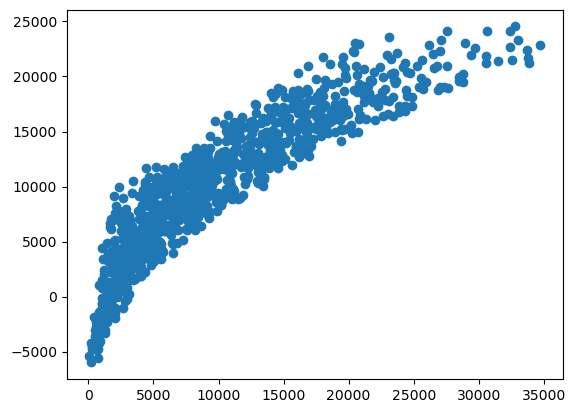

In [118]:
plt.scatter(ytest,ypred)

<Axes: xlabel='income_generated', ylabel='Density'>

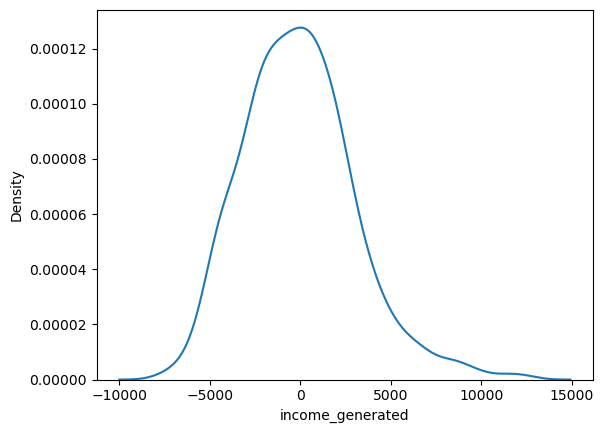

In [119]:
sns.kdeplot(ytest-ypred)

In [120]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1)
xtrainp=poly.fit_transform(xtrain)
xtestp=poly.transform(xtest)

In [121]:
pr=LinearRegression()
pr.fit(xtrainp,ytrain)
pr.coef_

array([   0.        , 4488.15393224,  -61.80187208,  -11.40935508,
         28.2254081 , -105.71105323,  -30.40844768, 4671.58795216,
         20.42995034,   67.16289065,   36.75288579,   32.197897  ,
         42.05199641])

In [122]:
pr.intercept_

9368.127275504332

In [123]:
ypred=pr.predict(xtestp)

In [124]:
mse=mean_squared_error(ytest,ypred)#beacuse the data is almost normally distributed that's why we apply mse
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)

In [125]:
print("mean_squared_error:",mse)
print("model accuracy:",r2*100)

mean_squared_error: 9618240.393059473
model accuracy: 81.84203531082088


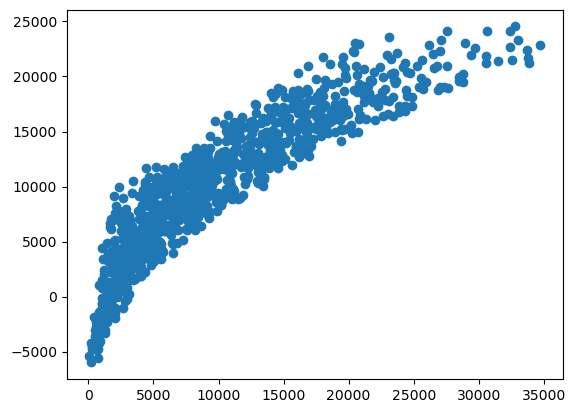

In [126]:
plt.scatter(ytest,ypred)

In [127]:
#because there is overfitting ,apply regularization #i.e ridge and lasso
from sklearn.linear_model import Lasso
# hyperparameter tuning 
for i in range (200,1001):
    l1=Lasso(i)
    l1.fit(xtrain,ytrain)
    score_train=l1.score(xtrain,ytrain)
    score_test=l1.score(xtest,ytest)
    print(f"i:{i}Training:{score_train} Testing:{score_test}")

i:200Training:0.8057617610108612 Testing:0.8160052734766469
i:201Training:0.8057464171780087 Testing:0.8159820756199246
i:202Training:0.8057309968173113 Testing:0.8159588032283726
i:203Training:0.8057154999287693 Testing:0.8159354563019908
i:204Training:0.8056999265123828 Testing:0.8159120348407792
i:205Training:0.8056842765681514 Testing:0.8158885388447378
i:206Training:0.8056685500960756 Testing:0.8158649683138666
i:207Training:0.805652747096155 Testing:0.8158413232481656
i:208Training:0.8056368675683898 Testing:0.8158176036476348
i:209Training:0.8056209115127799 Testing:0.8157938095122743
i:210Training:0.8056048789293254 Testing:0.8157699408420839
i:211Training:0.8055887698180263 Testing:0.8157459976370637
i:212Training:0.8055725841788826 Testing:0.8157219798972137
i:213Training:0.805556322011894 Testing:0.815697887622534
i:214Training:0.8055399833170609 Testing:0.8156737208130244
i:215Training:0.8055235680943831 Testing:0.815649479468685
i:216Training:0.8055070763438608 Testing:0.8

<Axes: xlabel='income_generated', ylabel='Density'>

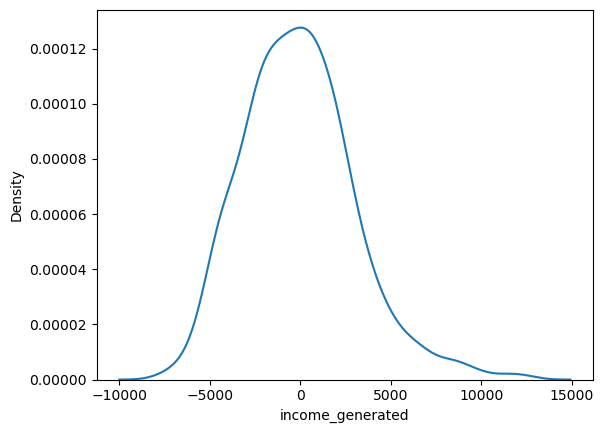

In [128]:
sns.kdeplot(ytest-ypred)

In [129]:
l1=Lasso(200)
l1.fit(xtrain,ytrain)
dict={"Columns":xtrain.columns,"Slope after applying Lasso":l1.coef_}
d=pd.DataFrame(dict)
d

Columns  Slope after applying Lasso
0   hours_worked_per_week                 4291.607638
1        experience_years                   -0.000000
2            skills_count                   -0.000000
3          average_rating                    0.000000
4      completed_projects                   -0.000000
5      client_return_rate                   -0.000000
6             hourly_rate                 4471.544013
7             region_Asia                   -0.000000
8           region_Europe                    0.000000
9    region_North America                    0.000000
10         region_Oceania                   -0.000000
11   region_South America                    0.000000

In [130]:
from sklearn.linear_model import Ridge
# hyperparameter tuning 
for i in range (1,50):
    l2=Ridge(i)
    l2.fit(xtrain,ytrain)
    score_train=l2.score(xtrain,ytrain)
    score_test=l2.score(xtest,ytest)
    print(f"i:{i}Training:{score_train} Testing:{score_test}")

i:1Training:0.8076859110108066 Testing:0.8184106522935213
i:2Training:0.8076857598658908 Testing:0.8184008580609069
i:3Training:0.8076855081439306 Testing:0.8183909705551364
i:4Training:0.8076851559970275 Testing:0.8183809899207541
i:5Training:0.8076847035770448 Testing:0.8183709163020785
i:6Training:0.8076841510356081 Testing:0.8183607498432021
i:7Training:0.8076834985241061 Testing:0.818350490687993
i:8Training:0.8076827461936906 Testing:0.8183401389800944
i:9Training:0.8076818941952778 Testing:0.8183296948629251
i:10Training:0.8076809426795477 Testing:0.8183191584796803
i:11Training:0.807679891796945 Testing:0.8183085299733318
i:12Training:0.8076787416976805 Testing:0.8182978094866288
i:13Training:0.8076774925317297 Testing:0.8182869971620977
i:14Training:0.8076761444488352 Testing:0.8182760931420431
i:15Training:0.8076746975985056 Testing:0.8182650975685477
i:16Training:0.8076731521300173 Testing:0.8182540105834735
i:17Training:0.8076715081924137 Testing:0.8182428323284612
i:18Trai

In [131]:
l2=Ridge(11)
l2.fit(xtrain,ytrain)
dict={"Columns":xtrain.columns,"Slope after applying Lasso":l2.coef_}
d=pd.DataFrame(dict)
d #Ridge does no feature selection

Columns  Slope after applying Lasso
0   hours_worked_per_week                 4475.943993
1        experience_years                  -61.461116
2            skills_count                  -11.287229
3          average_rating                   28.263502
4      completed_projects                 -105.807294
5      client_return_rate                  -30.331578
6             hourly_rate                 4658.677862
7             region_Asia                   19.376021
8           region_Europe                   66.378374
9    region_North America                   36.232715
10         region_Oceania                   31.447229
11   region_South America                   41.368998

In [132]:
dict={"Columns":xtrain.columns,
      "Slope of LinearRegression":lr.coef_,
      "Slope of Lasso":l1.coef_,
      "Slope of Ridge":l2.coef_}
d=pd.DataFrame(dict)
d

Columns  Slope of LinearRegression  Slope of Lasso  \
0   hours_worked_per_week                4488.153932     4291.607638   
1        experience_years                 -61.801872       -0.000000   
2            skills_count                 -11.409355       -0.000000   
3          average_rating                  28.225408        0.000000   
4      completed_projects                -105.711053       -0.000000   
5      client_return_rate                 -30.408448       -0.000000   
6             hourly_rate                4671.587952     4471.544013   
7             region_Asia                  20.429950       -0.000000   
8           region_Europe                  67.162891        0.000000   
9    region_North America                  36.752886        0.000000   
10         region_Oceania                  32.197897       -0.000000   
11   region_South America                  42.051996        0.000000   

    Slope of Ridge  
0      4475.943993  
1       -61.461116  
2       -11.287229  
3        28.263502  
4      -105.807294  
5       -30.331578  
6      4658.677862  
7        19.376021  
8        66.378374  
9        36.232715  
10       31.447229  
11       41.368998

In [133]:
!pip install xgboost

               Model         RMSE        R2
0  Linear Regression  3101.328811  0.818420
1   Ridge Regression  3101.411653  0.818411
2   Lasso Regression  3101.238178  0.818431
3      Decision Tree  2650.835587  0.867341
4      Random Forest  2402.040671  0.891074
5  Gradient Boosting  2319.194856  0.898458
6            XGBoost  2613.428920  0.871058
7                KNN  3234.525898  0.802488


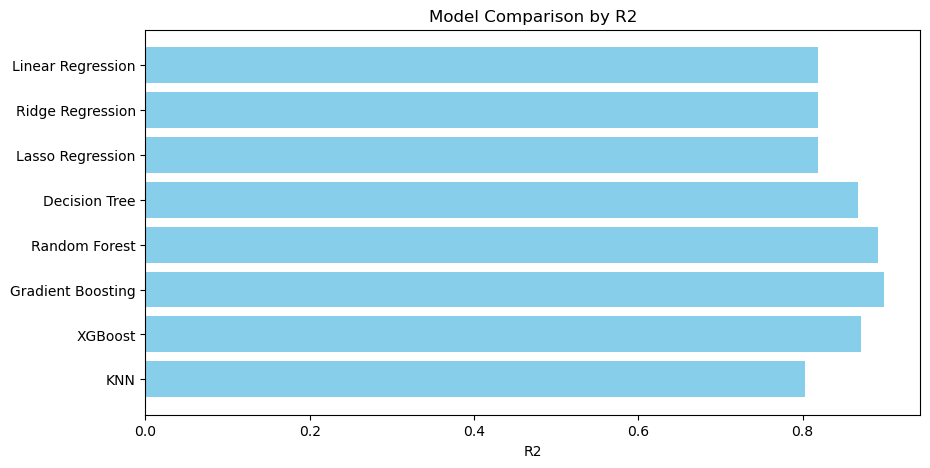

In [134]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    
    "KNN": KNeighborsRegressor()
}
# Store results
results = []
# Loop through each model
for name, model in models.items():
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    rmse = mean_squared_error(ytest, y_pred, squared=False)
    r2 = r2_score(ytest, y_pred)
    results.append({'Model': name, 'RMSE': rmse, 'R2': r2})

# Create DataFrame
results_df = pd.DataFrame(results)

# Display nicely
print(results_df)
# Optional: Plot RMSE
plt.figure(figsize=(10, 5))
plt.barh(results_df['Model'], results_df['R2'], color='skyblue')
plt.xlabel('R2')
plt.title('Model Comparison by R2')
plt.gca().invert_yaxis()
plt.show()

In [135]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_results = []

for name, model in models.items():
    rmse_scores = -cross_val_score(model, xtrain, ytrain, scoring='neg_root_mean_squared_error', cv=5)
    r2_scores = cross_val_score(model, xtrain, ytrain, scoring='r2', cv=5)
    cv_results.append({
        'Model': name,
        'CV_RMSE_Mean': np.mean(rmse_scores),
        'CV_R2_Mean': np.mean(r2_scores)
    })

cv_df = pd.DataFrame(cv_results).sort_values(by='CV_RMSE_Mean')
print(cv_df)


               Model  CV_RMSE_Mean  CV_R2_Mean
5  Gradient Boosting   2320.146623    0.895978
4      Random Forest   2401.532034    0.888147
3      Decision Tree   2545.295464    0.874670
6            XGBoost   2617.406725    0.867588
2   Lasso Regression   3175.376071    0.805602
1   Ridge Regression   3175.537084    0.805582
0  Linear Regression   3175.542075    0.805581
7                KNN   3237.555480    0.798116


<Figure size 1200x600 with 0 Axes>

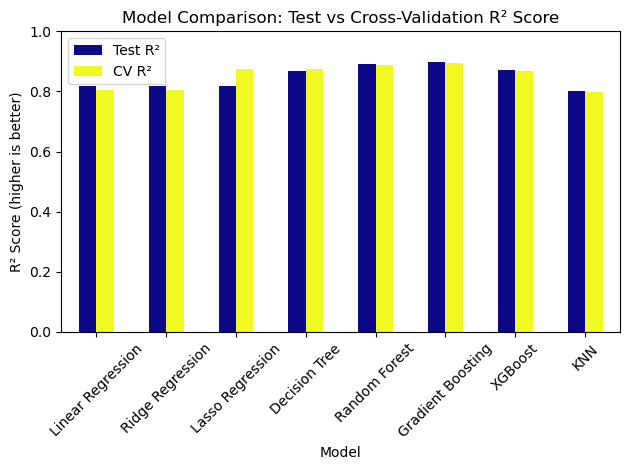

In [136]:
 # Example data (replace with your actual values from reports & CV)
 import pandas as pd
import matplotlib.pyplot as plt

# Example model names — use your actual ones
models = [
    'Linear Regression', 'Ridge Regression', 'Lasso Regression',
    'Decision Tree', 'Random Forest', 'Gradient Boosting',
    'XGBoost', 'KNN'
]

# Replace with your actual numbers from test set evaluation

test_r2 = [0.818420, 0.818411, 0.818431 , 0.867341, 0.891535 , 0.898496, 0.871058,  0.802488]           
cv_r2 = [0.805581, 0.805582, 0.874670, 0.874670, 0.889495, 0.896027, 0.867588, 0.798116]

# Create DataFrames
r2_df = pd.DataFrame({
    'Model': models,
    'Test R²': test_r2,
    'CV R²': cv_r2
})

# Plot R² Comparison
plt.figure(figsize=(12, 6))
r2_df.set_index('Model').plot(kind='bar', colormap='plasma')
plt.title('Model Comparison: Test vs Cross-Validation R² Score')
plt.ylabel('R² Score (higher is better)')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Hyperparameter Tuning

In [137]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Use GridSearchCV (more exhaustive) or RandomizedSearchCV (faster)
USE_RANDOMIZED = True  # Set False if you prefer GridSearchCV
#Define models as a dictionary
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "KNN": KNeighborsRegressor()
}

In [138]:
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 6]
    }
}


In [139]:
# ✅ Tuning function
def tune_model(name, model, param_grid, x, y, cv=5):
    print(f"\n🔍 Tuning {name}...")
    search = RandomizedSearchCV(model, param_grid, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)
    search.fit(x, y)
    print(f" Best Params: {search.best_params_}")
    print(f" Best CV RMSE: {-search.best_score_:.2f}")
    return search.best_estimator_

In [140]:
# ✅ Apply tuning on selected models
best_models = {}
for name, model in models.items():
    if name in param_grids:
        best_model = tune_model(name, model, param_grids[name], xtrain, ytrain)
        best_models[name + " (Tuned)"] = best_model
    else:
        best_models[name] = model  # Keep untuned version


🔍 Tuning Random Forest...
 Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10}
 Best CV RMSE: 2369.36

🔍 Tuning Gradient Boosting...
 Best Params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
 Best CV RMSE: 2320.23

🔍 Tuning XGBoost...
 Best Params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}
 Best CV RMSE: 2314.43


In [141]:
# ✅ Evaluate all models on test set
results = []
for name, model in best_models.items():
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)

    test_rmse = mean_squared_error(ytest, y_pred, squared=False)
    test_r2 = r2_score(ytest, y_pred)

    cv_rmse = -cross_val_score(model, xtrain, ytrain, scoring='neg_root_mean_squared_error', cv=5).mean()
    cv_r2 = cross_val_score(model, xtrain, ytrain, scoring='r2', cv=5).mean()

    results.append({
        'Model': name,
        'Test RMSE': test_rmse,
        'CV RMSE': cv_rmse,
        'Test R²': test_r2,
        'CV R²': cv_r2
    })

results_df = pd.DataFrame(results)


In [142]:
results_df

Model    Test RMSE      CV RMSE   Test R²     CV R²
0              Decision Tree  3399.274139  3196.364554  0.781856  0.805196
1      Random Forest (Tuned)  2365.231771  2369.465690  0.894387  0.890648
2  Gradient Boosting (Tuned)  2319.348726  2320.362219  0.898444  0.895988
3            XGBoost (Tuned)  2311.547400  2314.430684  0.899126  0.896569
4                        KNN  3234.525898  3237.555480  0.802488  0.798116

<Figure size 1200x600 with 0 Axes>

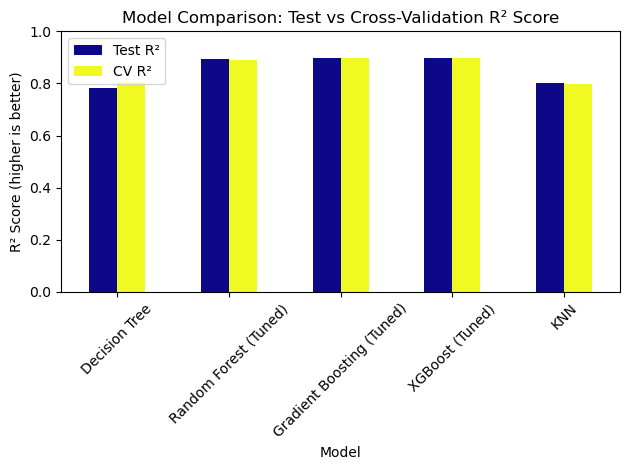

                       Model    Test RMSE      CV RMSE   Test R²     CV R²
3            XGBoost (Tuned)  2311.547400  2314.430684  0.899126  0.896569
2  Gradient Boosting (Tuned)  2319.348726  2320.362219  0.898444  0.895988
1      Random Forest (Tuned)  2365.231771  2369.465690  0.894387  0.890648
4                        KNN  3234.525898  3237.555480  0.802488  0.798116
0              Decision Tree  3399.274139  3196.364554  0.781856  0.805196


In [143]:
# ✅ Plot R² Comparison
plt.figure(figsize=(12, 6))
results_df.set_index('Model')[['Test R²', 'CV R²']].plot(kind='bar', colormap='plasma')
plt.title('Model Comparison: Test vs Cross-Validation R² Score')
plt.ylabel('R² Score (higher is better)')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ✅ Final result
print(results_df.sort_values(by='Test RMSE'))

In [144]:
untuned_results = []

for name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
    model = models[name]
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)

    test_rmse = mean_squared_error(ytest, y_pred, squared=False)
    test_r2 = r2_score(ytest, y_pred)

    untuned_results.append({
        'Model': name,
        'Tuning': 'Before',
        'Test RMSE': test_rmse,
        'Test R²': test_r2
    })


In [145]:
tuned_results = []

for name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
    model = tune_model(name, models[name], param_grids[name], xtrain, ytrain)
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)

    test_rmse = mean_squared_error(ytest, y_pred, squared=False)
    test_r2 = r2_score(ytest, y_pred)

    tuned_results.append({
        'Model': name,
        'Tuning': 'After',
        'Test RMSE': test_rmse,
        'Test R²': test_r2
    })



🔍 Tuning Random Forest...
 Best Params: {'n_estimators': 300, 'min_samples_split': 5, 'max_depth': 10}
 Best CV RMSE: 2365.68

🔍 Tuning Gradient Boosting...
 Best Params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
 Best CV RMSE: 2320.35

🔍 Tuning XGBoost...
 Best Params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}
 Best CV RMSE: 2314.43


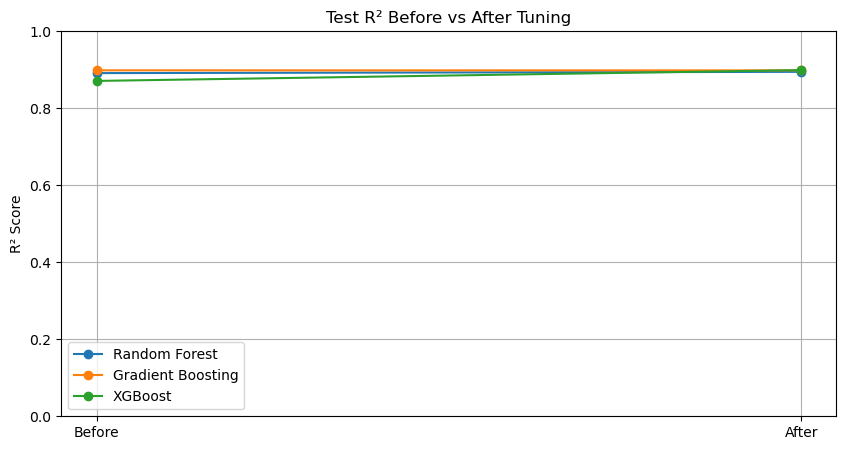

                     Test RMSE                Test R²          
Tuning                   After       Before     After    Before
Model                                                          
Gradient Boosting  2319.348726  2317.889730  0.898444  0.898572
Random Forest      2361.900988  2399.046415  0.894684  0.891345
XGBoost            2311.547400  2613.428920  0.899126  0.871058


In [146]:
# Combine both results
compare_df = pd.DataFrame(untuned_results + tuned_results)

# R² plot
plt.figure(figsize=(10, 5))
for model in compare_df['Model'].unique():
    subset = compare_df[compare_df['Model'] == model]
    plt.plot(['Before', 'After'], subset['Test R²'], marker='o', label=model)
plt.title('Test R² Before vs After Tuning')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

# Optional: Print table
print(compare_df.pivot(index='Model', columns='Tuning'))


In [147]:
print("X_train columns:", xtrain.columns.tolist())


X_train columns: ['hours_worked_per_week', 'experience_years', 'skills_count', 'average_rating', 'completed_projects', 'client_return_rate', 'hourly_rate', 'region_Asia', 'region_Europe', 'region_North America', 'region_Oceania', 'region_South America']


In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Define features
numerical_features = [
    'hours_worked_per_week', 'experience_years', 'skills_count',
    'average_rating', 'completed_projects', 'client_return_rate',
    'hourly_rate'
]
categorical_features = ['region']
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])
# --- 3. Create pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# --- 4. Load and split data
df = pd.read_csv('freelancer_income_dataset.csv')  # assuming your dummies are here
X = df.drop('income_generated', axis=1)
y = df['income_generated']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# ====== 6. Train the model ======
model_pipeline.fit(xtrain, ytrain)

# ====== 7. Evaluate ======
y_pred = model_pipeline.predict(xtest)
rmse = mean_squared_error(ytest, y_pred, squared=False)
print(f"✅ RMSE on test set: {rmse:.2f},{r2:.2f}")

# ====== 8. Save the model and test data ======
joblib.dump(model_pipeline, 'model_pipeline_gbr.pkl')
xtest.to_csv('test_data.csv', index=False)
ytest.to_csv('test_target.csv', index=False)
print("✅ Model and test data saved successfully.")

✅ RMSE on test set: 2333.71,0.90
✅ Model and test data saved successfully.


In [166]:
#### import joblib
import pandas as pd

# ====== 1. Load saved model ======
model = joblib.load('model_pipeline_gbr.pkl')

# ====== 2. User input ======

numeric_features = ['hours_worked_per_week', 'experience_years', 'skills_count',
                    'average_rating', 'completed_projects', 'client_return_rate', 'hourly_rate']
categorical_features = ['region']
input_features = numeric_features + categorical_features


# Collect user input
print("Enter freelancer details:")
user_input = {}
for feature in input_features:
    if feature in numeric_features:
        val = float(input(f"{feature}: "))
    else:
        val = input(f"{feature} (e.g., Asia, Europe, etc.): ")
    user_input[feature] = val

user_df = pd.DataFrame([user_input])

# ====== 3. Predict ======
predicted_income = model.predict(user_df)
print(f"💰 Predicted Income: {predicted_income[0]:.2f}")


Enter freelancer details:


hours_worked_per_week:  40
experience_years:  4
skills_count:  7
average_rating:  7.9
completed_projects:  50
client_return_rate:  0.9
hourly_rate:  30
region (e.g., Asia, Europe, etc.):  Asia


💰 Predicted Income: 4068.16
